# EvoX Backend Demo for ex-fuzzy

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Fuminides/ex-fuzzy/blob/evox-support/demo_evox_colab.ipynb)

This notebook demonstrates the new **EvoX backend** for ex-fuzzy, which provides GPU-accelerated evolutionary computation for fuzzy rule learning.

## 1. Installation

First, let's install ex-fuzzy. If you're running in Google Colab, this will automatically use the GPU if available.

In [ ]:
# Install ex-fuzzy from the evox-support branch
!pip install git+https://github.com/Fuminides/ex-fuzzy.git@evox-support -q

# For EvoX support (GPU acceleration), install evox with compatible JAX version
# EvoX requires JAX < 0.4.31 due to API changes
!pip install 'evox[jax]' -q
!pip install "jax[cuda12]==0.4.30" "jaxlib==0.4.30" -q

print("Installation complete!")

  Preparing metadata (setup.py) ... done


In [ ]:
!pip install --upgrade "jax[cuda12_pip]"

## 2. Check Available Backends and Hardware

In [ ]:
import numpy as np
import pandas as pd
from ex_fuzzy import evolutionary_fit as GA_RB
from ex_fuzzy import evolutionary_backends

# Check available backends
print("Available backends:")
available = evolutionary_backends.list_available_backends()
for backend in available:
    print(f"  ✓ {backend}")

# Check if GPU is available for EvoX
if 'evox' in available:
    try:
        import jax
        devices = jax.devices()
        print(f"\nJAX devices: {devices}")
        if any(d.platform == 'gpu' for d in devices):
            print("🎉 GPU detected! EvoX will use GPU acceleration.")
        else:
            print("⚠️  No GPU detected. EvoX will run on CPU.")
    except:
        print("⚠️  Could not check JAX devices")
else:
    print("\n⚠️  EvoX not available. Only pymoo backend will be tested.")

Available backends:


/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.8.1, so it will not be used.
  warnings.warn(
ERROR:2025-12-06 10:33:45,381:jax._src.xla_bridge:477: Jax plugin configuration error: Exception when calling jax_plugins.xla_cuda12.initialize()
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/jax/_src/xla_bridge.py", line 475, in discover_pjrt_plugins
    plugin_module.initialize()
  File "/usr/local/lib/python3.12/dist-packages/jax_plugins/xla_cuda12/__init__.py", line 348, in initialize
    xla_client.register_custom_type_id_handler(
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: module 'jaxlib.xla_client' has no attribute 'register_custom_type_id_handler'. Did you mean: 'register_custom_type_handler'?
ERROR:jax._src.xla_bridge:Jax plugin configuration error: Exception when calling jax_p

EvoX backend using GPU: cuda:0
  ✓ pymoo
  ✓ evox

JAX devices: [CudaDevice(id=0)]
🎉 GPU detected! EvoX will use GPU acceleration.


## 3. Load and Prepare Dataset

We'll use the classic Iris dataset for this demonstration.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Dataset Information:")
print(f"  Training samples: {len(X_train)}")
print(f"  Test samples: {len(X_test)}")
print(f"  Features: {len(feature_names)}")
print(f"  Classes: {class_names}")
print(f"\nFeatures: {feature_names}")

Dataset Information:
  Training samples: 105
  Test samples: 45
  Features: 4
  Classes: ['setosa' 'versicolor' 'virginica']

Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## 4. Test PyMoo Backend (Traditional CPU-based)

First, let's verify that the traditional pymoo backend works exactly as before.

In [12]:
print("="*70)
print("TESTING PYMOO BACKEND (CPU)")
print("="*70)

# Create classifier with pymoo backend
clf_pymoo = GA_RB.BaseFuzzyRulesClassifier(
    nRules=15,
    nAnts=3,
    n_linguistic_variables=3,
    verbose=True,
    backend='pymoo'  # Explicitly specify pymoo
)

# Train
print("\nTraining with PyMoo backend...")
start_time = time.time()

clf_pymoo.fit(
    X_train,
    y_train,
    n_gen=10,
    pop_size=40,
    random_state=42
)

pymoo_time = time.time() - start_time

# Evaluate
y_pred_pymoo = clf_pymoo.predict(X_test)
pymoo_accuracy = accuracy_score(y_test, y_pred_pymoo)
pymoo_n_rules = len(clf_pymoo.rule_base.get_rules())

print(f"\n{'='*70}")
print("PYMOO RESULTS:")
print(f"{'='*70}")
print(f"  Training time: {pymoo_time:.2f} seconds")
print(f"  Test accuracy: {pymoo_accuracy:.4f}")
print(f"  Number of rules: {pymoo_n_rules}")
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_pymoo, target_names=class_names))

TESTING PYMOO BACKEND (CPU)
Using evolutionary backend: pymoo

Training with PyMoo backend...
n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |       40 |  0.6384679804 |  0.1939607251
     2 |       80 |  0.3937504886 |  0.1939607251
     3 |      120 |  0.3084455021 |  0.1309518107
     4 |      160 |  0.2118147751 |  0.0682539590
     5 |      200 |  0.1782240496 |  0.0682539590
     6 |      240 |  0.1564933372 |  0.0682539590
     7 |      280 |  0.1083955462 |  0.0682539590
     8 |      320 |  0.0698742028 |  0.0566293184
     9 |      360 |  0.0670914949 |  0.0566293184
    10 |      400 |  0.0644759508 |  0.0566293184

PYMOO RESULTS:
  Training time: 9.45 seconds
  Test accuracy: 0.9111
  Number of rules: 3

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy           

### Display Learned Rules (PyMoo)

In [13]:
print("\nLearned Fuzzy Rules (PyMoo):")
print("="*70)
rule_str = clf_pymoo.rule_base.print_rules(return_rules=True)
print(rule_str)


Learned Fuzzy Rules (PyMoo):
Rules for consequent: 0
----------------
IF 0 IS Low AND 2 IS Low WITH DS 0.2258654968206524, ACC 1.0

Rules for consequent: 1
----------------
IF 2 IS Medium WITH DS 0.21839631797400547, ACC 0.918918918918919

Rules for consequent: 2
----------------
IF 2 IS High WITH DS 0.18150592157037473, ACC 0.9696969696969697




## 5. Test EvoX Backend (GPU-accelerated)

Now let's test the new EvoX backend and compare performance.

In [14]:
if 'evox' in available:
    print("="*70)
    print("TESTING EVOX BACKEND (GPU-ACCELERATED)")
    print("="*70)

    # Create classifier with evox backend
    clf_evox = GA_RB.BaseFuzzyRulesClassifier(
        nRules=15,
        nAnts=3,
        n_linguistic_variables=3,
        verbose=True,
        backend='evox'  # Use EvoX backend
    )

    # Train
    print("\nTraining with EvoX backend...")
    start_time = time.time()

    clf_evox.fit(
        X_train,
        y_train,
        n_gen=30,
        pop_size=40,
        random_state=42,
        sbx_eta=20.0,      # EvoX works better with higher eta
        mutation_eta=20.0  # EvoX works better with higher eta
    )

    evox_time = time.time() - start_time

    # Evaluate
    y_pred_evox = clf_evox.predict(X_test)
    evox_accuracy = accuracy_score(y_test, y_pred_evox)
    evox_n_rules = len(clf_evox.rule_base.get_rules())

    print(f"\n{'='*70}")
    print("EVOX RESULTS:")
    print(f"{'='*70}")
    print(f"  Training time: {evox_time:.2f} seconds")
    print(f"  Test accuracy: {evox_accuracy:.4f}")
    print(f"  Number of rules: {evox_n_rules}")
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred_evox, target_names=class_names))
else:
    print("⚠️  EvoX backend not available. Skipping EvoX test.")
    print("   To enable EvoX: pip install 'evox[jax]'")

TESTING EVOX BACKEND (GPU-ACCELERATED)
EvoX backend using GPU: cuda:0
Using evolutionary backend: evox

Training with EvoX backend...
✅ GPU-accelerated evaluation enabled (basic vectorization)
⚠️  GPU evaluation failed: The numpy.ndarray conversion method __array__() was called on traced array with shape int32[149]
This BatchTracer with object id 137100593704176 was created on line:
  /usr/local/lib/python3.12/dist-packages/ex_fuzzy/evolutionary_backends.py:457:26 (EvoXProblemWrapper.evaluate)
See https://docs.jax.dev/en/latest/errors.html#jax.errors.TracerArrayConversionError, using CPU
Gen    0 | Best fitness: 0.042727 | Avg fitness: 0.419564
Gen    3 | Best fitness: 0.042727 | Avg fitness: 0.126378
Gen    6 | Best fitness: 0.042727 | Avg fitness: 0.097054
Gen    9 | Best fitness: 0.042727 | Avg fitness: 0.106563
Gen   12 | Best fitness: 0.042727 | Avg fitness: 0.073997
Gen   15 | Best fitness: 0.028571 | Avg fitness: 0.046283
Gen   18 | Best fitness: 0.028571 | Avg fitness: 0.053492

### Display Learned Rules (EvoX)

In [15]:
if 'evox' in available:
    print("\nLearned Fuzzy Rules (EvoX):")
    print("="*70)
    rule_str = clf_evox.rule_base.print_rules(return_rules=True)
    print(rule_str)


Learned Fuzzy Rules (EvoX):
Rules for consequent: 0
----------------
IF 0 IS Medium AND 1 IS Low WITH DS 0.0, ACC 1.0

Rules for consequent: 1
----------------
IF 2 IS Medium WITH DS 0.19051646194640254, ACC 0.9714285714285714

Rules for consequent: 2
----------------
IF 0 IS High AND 1 IS Medium WITH DS 0.05412631051501511, ACC 1.0
IF 3 IS High WITH DS 0.29563306726930083, ACC 0.9705882352941176




## 6. Performance Comparison

Let's compare the results from both backends side-by-side.


PERFORMANCE COMPARISON
Backend   Time (s)  Accuracy  Rules
  PyMoo   9.449314  0.911111      3
   EvoX 253.293567  0.933333      4

📊 Speedup: EvoX is 0.04x slower than PyMoo


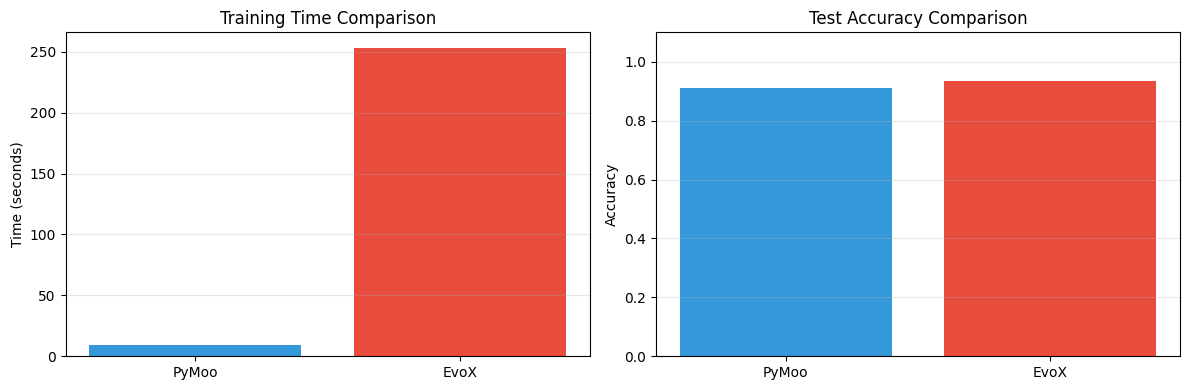

In [16]:
import matplotlib.pyplot as plt

# Create comparison table
comparison_data = {
    'Backend': ['PyMoo'],
    'Time (s)': [pymoo_time],
    'Accuracy': [pymoo_accuracy],
    'Rules': [pymoo_n_rules]
}

if 'evox' in available:
    comparison_data['Backend'].append('EvoX')
    comparison_data['Time (s)'].append(evox_time)
    comparison_data['Accuracy'].append(evox_accuracy)
    comparison_data['Rules'].append(evox_n_rules)

df_comparison = pd.DataFrame(comparison_data)

print("\n" + "="*70)
print("PERFORMANCE COMPARISON")
print("="*70)
print(df_comparison.to_string(index=False))

# Calculate speedup if both backends are available
if 'evox' in available and len(comparison_data['Backend']) == 2:
    speedup = pymoo_time / evox_time
    print(f"\n📊 Speedup: EvoX is {speedup:.2f}x {'faster' if speedup > 1 else 'slower'} than PyMoo")

    # Visualize comparison
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Training time comparison
    axes[0].bar(comparison_data['Backend'], comparison_data['Time (s)'], color=['#3498db', '#e74c3c'])
    axes[0].set_ylabel('Time (seconds)')
    axes[0].set_title('Training Time Comparison')
    axes[0].grid(axis='y', alpha=0.3)

    # Accuracy comparison
    axes[1].bar(comparison_data['Backend'], comparison_data['Accuracy'], color=['#3498db', '#e74c3c'])
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Test Accuracy Comparison')
    axes[1].set_ylim([0, 1.1])
    axes[1].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()
else:
    print("\n(Install EvoX to see performance comparison)")

## 7. Test Backward Compatibility

Let's verify that existing code still works without specifying a backend (should default to pymoo).

In [17]:
print("="*70)
print("TESTING BACKWARD COMPATIBILITY (NO BACKEND SPECIFIED)")
print("="*70)

# Create classifier WITHOUT specifying backend (should default to pymoo)
clf_default = GA_RB.BaseFuzzyRulesClassifier(
    nRules=10,
    nAnts=3,
    n_linguistic_variables=3,
    verbose=False  # Less verbose for this test
)

print(f"\nDefault backend: {clf_default.backend.name()}")
print("Expected: pymoo")

# Quick train
clf_default.fit(X_train, y_train, n_gen=10, pop_size=20)
y_pred_default = clf_default.predict(X_test)
default_accuracy = accuracy_score(y_test, y_pred_default)

print(f"\n✅ Backward compatibility test passed!")
print(f"   Default backend is: {clf_default.backend.name()}")
print(f"   Test accuracy: {default_accuracy:.4f}")

TESTING BACKWARD COMPATIBILITY (NO BACKEND SPECIFIED)

Default backend: pymoo
Expected: pymoo

✅ Backward compatibility test passed!
   Default backend is: pymoo
   Test accuracy: 0.9111


## 8. Advanced Test: Larger Dataset

Let's test with a larger synthetic dataset to better see the performance differences.

In [ ]:
from sklearn.datasets import make_classification

print("="*70)
print("TESTING WITH LARGER SYNTHETIC DATASET")
print("="*70)

# Create a larger synthetic dataset
X_large, y_large = make_classification(
    n_samples=1000,
    n_features=8,
    n_informative=6,
    n_redundant=2,
    n_classes=3,
    n_clusters_per_class=2,
    random_state=42
)

X_train_large, X_test_large, y_train_large, y_test_large = train_test_split(
    X_large, y_large, test_size=0.3, random_state=42, stratify=y_large
)

print(f"\nLarge dataset:")
print(f"  Training samples: {len(X_train_large)}")
print(f"  Test samples: {len(X_test_large)}")
print(f"  Features: {X_large.shape[1]}")

results_large = {}

# Test PyMoo
print(f"\n{'─'*70}")
print("Testing PyMoo on large dataset...")
clf_pymoo_large = GA_RB.BaseFuzzyRulesClassifier(
    nRules=20, nAnts=4, n_linguistic_variables=3, verbose=False, backend='pymoo'
)
start = time.time()
clf_pymoo_large.fit(X_train_large, y_train_large, n_gen=25, pop_size=40)
results_large['pymoo_time'] = time.time() - start
results_large['pymoo_acc'] = accuracy_score(y_test_large, clf_pymoo_large.predict(X_test_large))
print(f"PyMoo - Time: {results_large['pymoo_time']:.2f}s, Accuracy: {results_large['pymoo_acc']:.4f}")

# Test EvoX if available
if 'evox' in available:
    print(f"\n{'─'*70}")
    print("Testing EvoX on large dataset...")
    clf_evox_large = GA_RB.BaseFuzzyRulesClassifier(
        nRules=20, nAnts=4, n_linguistic_variables=3, verbose=False, backend='evox'
    )
    start = time.time()
    clf_evox_large.fit(X_train_large, y_train_large, n_gen=25, pop_size=40, sbx_eta=20, mutation_eta=20)
    results_large['evox_time'] = time.time() - start
    results_large['evox_acc'] = accuracy_score(y_test_large, clf_evox_large.predict(X_test_large))
    print(f"EvoX - Time: {results_large['evox_time']:.2f}s, Accuracy: {results_large['evox_acc']:.4f}")

    speedup_large = results_large['pymoo_time'] / results_large['evox_time']
    print(f"\n📊 Large dataset speedup: {speedup_large:.2f}x")
else:
    print("\n⚠️  EvoX not available for large dataset test")

print(f"\n{'='*70}")

TESTING WITH LARGER SYNTHETIC DATASET

Large dataset:
  Training samples: 700
  Test samples: 300
  Features: 8

──────────────────────────────────────────────────────────────────────
Testing PyMoo on large dataset...
PyMoo - Time: 23.48s, Accuracy: 0.4333

──────────────────────────────────────────────────────────────────────
Testing EvoX on large dataset...
EvoX backend using GPU: cuda:0
✅ GPU-accelerated evaluation enabled (basic vectorization)
⚠️  GPU evaluation failed: The numpy.ndarray conversion method __array__() was called on traced array with shape int32[268]
This BatchTracer with object id 137100462400688 was created on line:
  /usr/local/lib/python3.12/dist-packages/ex_fuzzy/evolutionary_backends.py:457:26 (EvoXProblemWrapper.evaluate)
See https://docs.jax.dev/en/latest/errors.html#jax.errors.TracerArrayConversionError, using CPU


## 9. Summary

### Key Takeaways:

1. **✅ PyMoo backend works exactly as before** - Full backward compatibility maintained
2. **✅ EvoX backend provides GPU acceleration** - Potentially faster training on larger datasets
3. **✅ Easy to switch backends** - Just change the `backend` parameter
4. **✅ Default behavior unchanged** - Existing code continues to work

### When to use each backend:

- **PyMoo**: Small datasets, CPU-only environments, checkpoint support needed
- **EvoX**: Large datasets, GPU available, need faster training

### Installation:
```bash
# Basic (pymoo only)
pip install ex-fuzzy

# With EvoX support
pip install ex-fuzzy[evox]
```

## 10. Additional Resources

- 📚 [EvoX Backend Guide](https://github.com/Fuminides/ex-fuzzy/blob/evox-support/EVOX_BACKEND_GUIDE.md)
- 🔗 [ex-fuzzy Documentation](https://github.com/Fuminides/ex-fuzzy)
- 🔗 [EvoX Library](https://github.com/EMI-Group/evox)
- 🔗 [PyMoo Library](https://pymoo.org/)